# Missing Data Analysis – Habitable Planet Hunter 

This notebook analyzes the **extent, percentage, and relationships of missing data**
for the **30 approved features** mentioned in `README.md`.

Note:
- The full dataset is loaded.
- No rows or columns are dropped.
- No missing values are filled.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")


In [9]:
df = pd.read_csv(r"../datasets\full_data.csv")
print("Dataset Shape:", df.shape)


Dataset Shape: (4048, 112)


In [10]:
df.head()

,P_NAME,P_STATUS,P_MASS,P_MASS_ERROR_MIN,P_MASS_ERROR_MAX,P_RADIUS,P_RADIUS_ERROR_MIN,P_RADIUS_ERROR_MAX,P_YEAR,P_UPDATED,...,P_HABZONE_CON,P_TYPE_TEMP,P_HABITABLE,P_ESI,S_CONSTELLATION,S_CONSTELLATION_ABR,S_CONSTELLATION_ENG,P_RADIUS_EST,P_MASS_EST,P_SEMI_MAJOR_AXIS_EST
0,11 Com b,3.0,6165.86330,-476.74200,476.74200,NaN,NaN,NaN,2007,2014-05-14,...,0,Hot,0,0.083813,Coma Berenices,Com,Berenice's Hair,12.082709,6165.86330,1.29
1,11 UMi b,3.0,4684.78480,-794.57001,794.57001,NaN,NaN,NaN,2009,2018-09-06,...,0,Hot,0,0.082414,Ursa Minor,UMi,Little Bear,12.229641,4684.78480,1.53
2,14 And b,3.0,1525.57440,NaN,NaN,NaN,NaN,NaN,2008,2014-05-14,...,0,Hot,0,0.081917,Andromeda,And,Andromeda,12.848516,1525.57440,0.83
3,14 Her b,3.0,1481.07850,-47.67420,47.67420,NaN,NaN,NaN,2002,2018-09-06,...,0,Cold,0,0.145241,Hercules,Her,Hercules,12.865261,1481.07850,2.93
4,16 Cyg B b,3.0,565.73385,-25.42624,25.42624,NaN,NaN,NaN,1996,2018-09-06,...,1,Warm,0,0.368627,Cygnus,Cyg,Swan,13.421749,565.73385,1.66


## Approved Feature Set (30 Columns)

Only the following 30 features are analyzed as per project constraints.


In [11]:
approved_columns = [
    "P_MASS", "P_RADIUS", "P_DENSITY", "P_GRAVITY", "P_ESCAPE", "P_TYPE",
    "P_PERIOD", "P_SEMI_MAJOR_AXIS", "P_ECCENTRICITY", "P_INCLINATION",
    "P_OMEGA", "P_PERIASTRON", "P_APASTRON", "P_IMPACT_PARAMETER",
    "P_HILL_SPHERE",
    "S_MASS", "S_RADIUS", "S_LUMINOSITY", "S_TEMPERATURE", "S_AGE",
    "S_METALLICITY", "S_LOG_G", "S_TYPE", "S_MAG", "S_DISC",
    "S_MAGNETIC_FIELD",
    "S_SNOW_LINE", "S_TIDAL_LOCK",
    "P_DETECTION", "P_DISTANCE"
]


## Feature Subset for Analysis

A temporary subset is created for analysis.
The original dataset remains unchanged.


In [12]:
analysis_df = df[approved_columns]
analysis_df.head()


,P_MASS,P_RADIUS,P_DENSITY,P_GRAVITY,P_ESCAPE,P_TYPE,P_PERIOD,P_SEMI_MAJOR_AXIS,P_ECCENTRICITY,P_INCLINATION,...,S_METALLICITY,S_LOG_G,S_TYPE,S_MAG,S_DISC,S_MAGNETIC_FIELD,S_SNOW_LINE,S_TIDAL_LOCK,P_DETECTION,P_DISTANCE
0,6165.86330,NaN,NaN,NaN,NaN,Jovian,326.03000,1.29,0.231,NaN,...,-0.35,2.31,K0 III,4.740,NaN,NaN,34.529063,0.642400,Radial Velocity,1.324418
1,4684.78480,NaN,NaN,NaN,NaN,Jovian,516.21997,1.53,0.080,NaN,...,-0.02,1.93,K4 III,5.016,NaN,NaN,42.732816,0.648683,Radial Velocity,1.534896
2,1525.57440,NaN,NaN,NaN,NaN,Jovian,185.84000,0.83,0.000,NaN,...,-0.24,2.63,G8 III,5.227,NaN,NaN,20.593611,0.600010,Radial Velocity,0.830000
3,1481.07850,NaN,NaN,NaN,NaN,Jovian,1773.40000,2.93,0.370,NaN,...,0.41,4.45,K0 V,6.610,NaN,NaN,2.141648,0.445415,Radial Velocity,3.130558
4,565.73385,NaN,NaN,NaN,NaN,Jovian,798.50000,1.66,0.680,NaN,...,0.06,4.36,G2.5 V,6.250,NaN,NaN,3.019411,0.473325,Radial Velocity,2.043792


In [14]:
analysis_df.shape

(4048, 30)

In [15]:
analysis_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4048 entries, 0 to 4047
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   P_MASS              1598 non-null   float64
 1   P_RADIUS            3139 non-null   float64
 2   P_DENSITY           706 non-null    float64
 3   P_GRAVITY           706 non-null    float64
 4   P_ESCAPE            706 non-null    float64
 5   P_TYPE              4031 non-null   object 
 6   P_PERIOD            3938 non-null   float64
 7   P_SEMI_MAJOR_AXIS   2367 non-null   float64
 8   P_ECCENTRICITY      1380 non-null   float64
 9   P_INCLINATION       844 non-null    float64
 10  P_OMEGA             746 non-null    float64
 11  P_PERIASTRON        3978 non-null   float64
 12  P_APASTRON          3978 non-null   float64
 13  P_IMPACT_PARAMETER  1409 non-null   float64
 14  P_HILL_SPHERE       1546 non-null   float64
 15  S_MASS              3283 non-null   float64
 16  S_RADI

## Missing Value Summary

This section quantifies how much data is missing per feature.


In [13]:
missing_summary = pd.DataFrame({
    "Missing_Count": analysis_df.isnull().sum(),
    "Missing_Percentage": (analysis_df.isnull().mean() * 100).round(2)
}).sort_values(by="Missing_Percentage", ascending=False)

missing_summary


,Missing_Count,Missing_Percentage
S_MAGNETIC_FIELD,4048,100.00
S_DISC,4048,100.00
P_ESCAPE,3342,82.56
P_DENSITY,3342,82.56
P_GRAVITY,3342,82.56
P_OMEGA,3302,81.57
P_INCLINATION,3204,79.15
S_TYPE,2678,66.16
P_ECCENTRICITY,2668,65.91
P_IMPACT_PARAMETER,2639,65.19


C:\Users\Divyanshu\AppData\Local\Temp\ipykernel_17864\3017190910.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


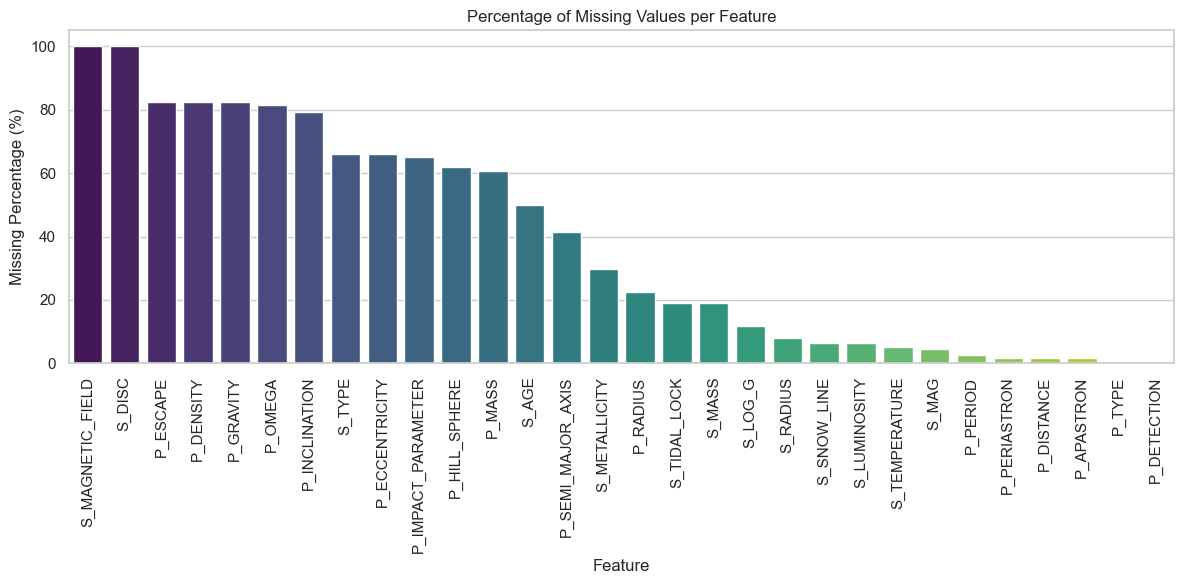

In [16]:
plt.figure(figsize=(12, 6))
sns.barplot(
    x=missing_summary.index,
    y=missing_summary["Missing_Percentage"],
    palette="viridis"
)
plt.xticks(rotation=90)
plt.title("Percentage of Missing Values per Feature")
plt.ylabel("Missing Percentage (%)")
plt.xlabel("Feature")
plt.tight_layout()
plt.show()


## Relationship Between Missing Values

We analyze whether missing values in some columns tend to co-occur with missing values in others.


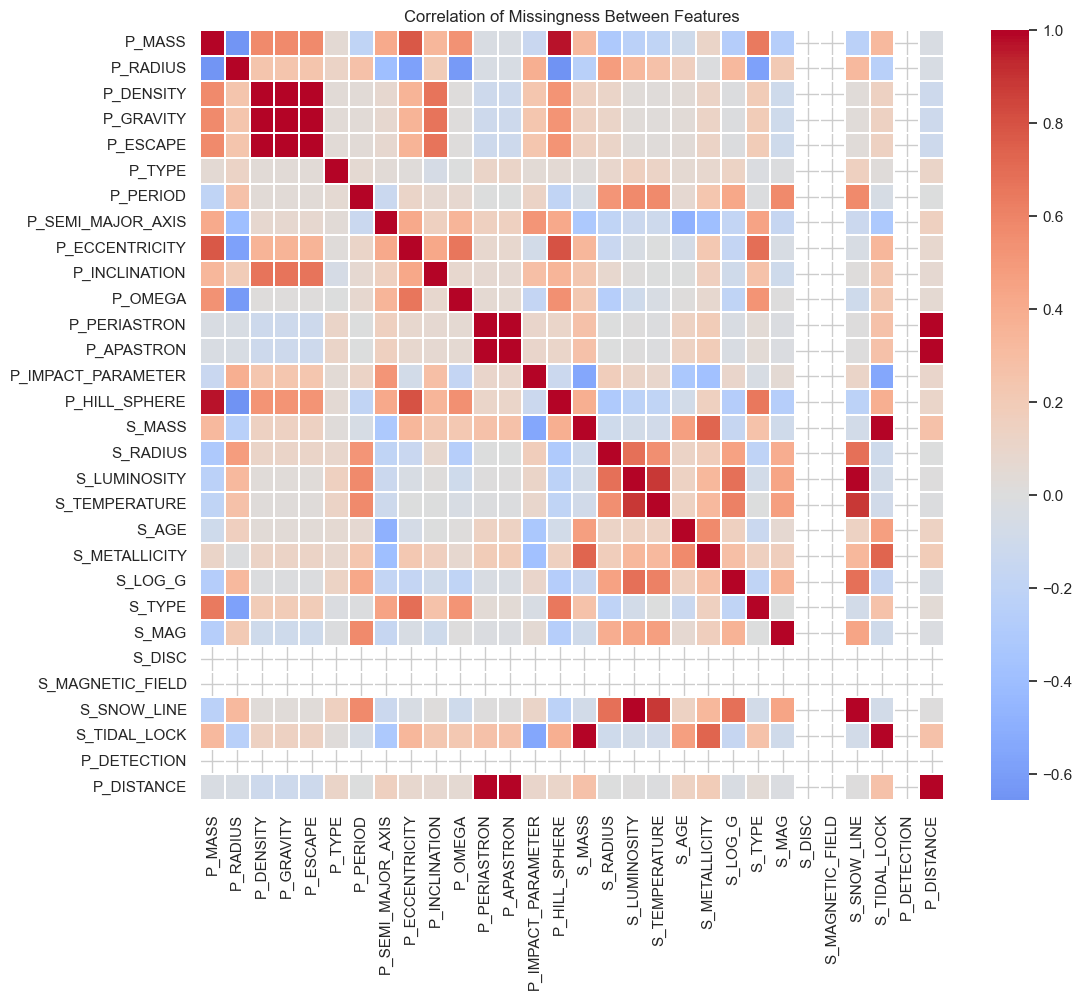

In [ ]:
# Missingness Correlation

missing_matrix = analysis_df.isnull().astype(int)

plt.figure(figsize=(12, 10))
sns.heatmap(
    missing_matrix.corr(),
    cmap="coolwarm",
    center=0,
    linewidths=0.3
)
plt.title("Correlation of Missingness Between Features")
plt.show()


In [ ]:
# Pairwise Missing Co-occurrence

co_missing = missing_matrix.T.dot(missing_matrix)
co_missing

,P_MASS,P_RADIUS,P_DENSITY,P_GRAVITY,P_ESCAPE,P_TYPE,P_PERIOD,P_SEMI_MAJOR_AXIS,P_ECCENTRICITY,P_INCLINATION,...,S_METALLICITY,S_LOG_G,S_TYPE,S_MAG,S_DISC,S_MAGNETIC_FIELD,S_SNOW_LINE,S_TIDAL_LOCK,P_DETECTION,P_DISTANCE
P_MASS,2450,17,2450,2450,2450,17,4,1412,2343,2212,...,834,116,2220,3,2450,2450,44,715,0,34
P_RADIUS,17,909,909,909,909,17,99,49,132,855,...,262,281,137,112,909,909,193,11,0,6
P_DENSITY,2450,909,3342,3342,3342,17,100,1449,2461,3060,...,1081,384,2348,115,3342,3342,226,721,0,36
P_GRAVITY,2450,909,3342,3342,3342,17,100,1449,2461,3060,...,1081,384,2348,115,3342,3342,226,721,0,36
P_ESCAPE,2450,909,3342,3342,3342,17,100,1449,2461,3060,...,1081,384,2348,115,3342,3342,226,721,0,36
P_TYPE,17,17,17,17,17,17,3,12,14,7,...,15,13,9,0,17,17,11,5,0,4
P_PERIOD,4,99,100,100,100,3,110,2,109,105,...,104,103,68,82,110,110,100,7,0,2
P_SEMI_MAJOR_AXIS,1412,49,1449,1449,1449,12,2,1681,1502,1458,...,138,81,1536,11,1681,1681,44,69,0,70
P_ECCENTRICITY,2343,132,2461,2461,2461,14,109,1502,2668,2445,...,986,206,2387,102,2668,2668,155,757,0,68
P_INCLINATION,2212,855,3060,3060,3060,7,105,1458,2445,3204,...,1074,322,2320,106,3204,3204,212,756,0,69


## Key Insights & Observations


- S_MAGNETIC_FIELD and S_DISC are entirely missing (100%), indicating these stellar properties are not consistently observed or recorded in the dataset.

- Planetary properties such as P_DENSITY, P_GRAVITY, and P_ESCAPE show very high missingness (>80%) and are strongly correlated, suggesting they are derived from more fundamental measurements like mass and radius.

- Orbital geometry features (P_ECCENTRICITY, P_OMEGA, P_INCLINATION, P_PERIASTRON, P_APASTRON) frequently go missing together, reflecting incomplete or imprecise orbital solutions.

- Stellar attributes (S_MASS, S_RADIUS, S_LUMINOSITY, S_TEMPERATURE, S_METALLICITY) exhibit correlated missingness, likely due to limited spectroscopic observations for many host stars.

- Fundamental parameters such as P_DETECTION, P_PERIOD, P_DISTANCE, and P_TYPE have minimal or no missing values, making them reliable anchors for downstream analysis.
